In [ ]:
# from IPython.display import HTML
# # this cell hides all the code cells by default
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script><font size=4>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</font>''')

In [ ]:
# remove warnings before sharing the nb
# import warnings
# warnings.filterwarnings('ignore')

As the title of the notebook indicates, the purpose of this document 
is to design a list of criteria that any ME measure we pick must 
fulfill.

A word on **notation**:  
- We write $m_i(t)$ for motion energy on trial $i$ at time $t$.  
- We write $\langle m(t)\rangle_i$ to mean the average across trials, at time $t$.  
- We write $\langle m_i\rangle_t$ to mean the time average, for trial $i$.  
- We write $M$ for the double expectation, along trial and time dimensions.  
- We add superscript $^j$ to label specific measure definitions.
- We write the sign function as $\rm sign$, and dismiss the fact that ${\rm sign}(0)=0$

In [ ]:
# Furthermore, we use the following variables for stimulus parameters:
# from IPython.display import HTML, display
# html_table = '<table style="width:40%"> <tr> <th><font size="4">Variable</font></th> <th><font size="4">Meaning</font></th> </tr> <tr> <td><font size="4">c</font></td> <td><font size="4">signed coherence in %</font></td></tr> <tr> <td><font size="4">n</font></td> <td><font size="4">number of dots per frame</font></td> </tr><tr> <td><font size="4">n_c(t;i)</font></td> <td><font size="4">number of coherent dots</font></td>   </tr></table>'
# display(HTML(html_table))

# List of criteria  a ME measure must meet
* Scalar quantity that evolves with time
* On average (across trials), the sign of the quantity matches the true direction of motion of the coherent dots, at any instant in time
* For fixed coherence (and other params), the fluctuations of the ME signal are "small"
* The behaviors illustrated in the plots below should hold

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import motionenergy as kiani_me
import stimulus as stim
import ME_functions as my_me
from scipy.ndimage import maximum_filter

In [2]:
%matplotlib inline

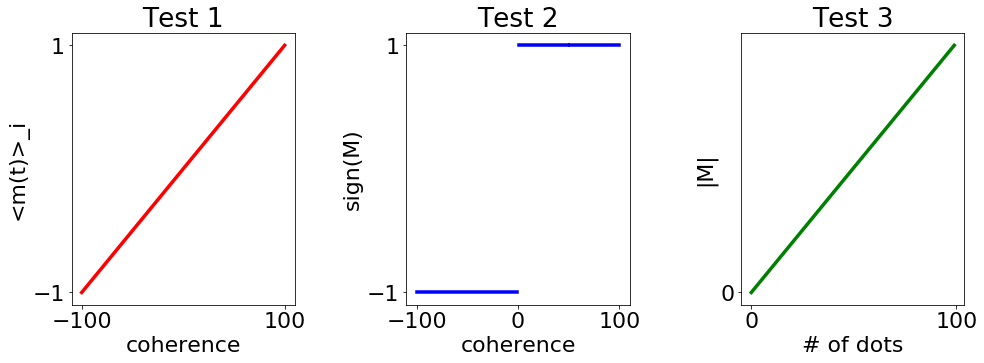

In [11]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h) # figure size 
plt.rcParams.update({'font.size': 22}) # font size on axes
plt.subplots_adjust(wspace=0.5) # horizontal space between panels
lw = 3.5

test_colors = {1:'red', 2:'blue', 3:'green'}

ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

# plot 1  --  Test 1
test_number = 1
c = np.arange(201) - 100
rescaled_c = c/100
ax1.plot(c,rescaled_c, linewidth=lw, color=test_colors[test_number])

# plot 2  --  Test 2
test_number = 2
signed_M = np.sign(rescaled_c)
# for ref on masks below, see
# https://stackoverflow.com/a/5940970
masked_coh = np.ma.masked_equal(c,50)
masked_signed_M = np.ma.masked_equal(signed_M,0)

ax2.plot(masked_coh, masked_signed_M, linewidth=lw, color=test_colors[test_number])

# plot 3  --  Test 3
test_number = 3
numDots = np.arange(100)
ax3.plot(numDots,numDots, linewidth=lw, color=test_colors[test_number])


# labels plot 1
ax1.set_title('Test 1')
ax1.set_xlabel('coherence')
ax1.set_ylabel('<m(t)>_i')
ax1.set_yticks([-1,1])
ax1.set_xticks([-100,100])

# labels plot 2
ax2.set_title('Test 2')
ax2.set_xlabel('coherence')
ax2.set_ylabel('sign(M)')
ax2.set_yticks([-1,1])

# labels plot 3
ax3.set_title('Test 3')
ax3.set_xlabel('# of dots')
ax3.set_ylabel('|M|')
ax3.set_yticks([0])
ax3.set_xticks([0,len(numDots)])

# Measure 1
$$M:=\frac{c}{100}\cdot n$$

This measure passes tests 2 and 3 above. But since it is a global measure that is independent of time and trial index, test 1 has no meaning for it.

# Measure 2
Another simple measure of ME is the number of coherent dots, for a given trial and time instant:

$$m_i(t):={\rm sign(c)}n_c(t;i)$$

Note that, assuming the total number of visible dots $n$ on each frame is the same,
our snow-dots algorithm draws $n_c(t;i)$ from a Binomial random variable with parameters 
$(n, |c| / 100)$.
Hence, for this measure, $M$ is the same as measure 1 above and automatically passes tests 2 & 3.

Test 1 is also passed, because $\langle m(t)\rangle_i = n|c|/100$, and therefore, the average (across trials) instantaneous strength of this measure is proportional to coherence. 
Note also that the sign of $m_i(t)$ is the same as that of $c$.

We might want a measure that can have a sign incompatible with the true coherent direction of motion, on any given trial, at any given time.

## Empirical measure of measure 2 

Our goal here is to use an actual dataset of dots to run test 1 on measure 2.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(data.table)

/home/adrian/anaconda3/envs/ME_particle/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: data.table 1.12.0  Latest news: r-datatable.com

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R 
dataFolder <- "/home/adrian/programing/data/motion_energy/"
dataTag <- "ME_DB_1"
datafile <- paste(dataFolder,dataTag,".csv",sep='')
data <- fread(file=datafile, header=TRUE, sep=",")
str(data)

Classes ‘data.table’ and 'data.frame':	24138 obs. of  22 variables:
 $ stencilNumber: int  1 1 1 1 1 1 1 1 1 1 ...
 $ pixelSize    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ diameter     : int  10 10 10 10 10 10 10 10 10 10 ...
 $ speed        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ yCenter      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ xCenter      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ density      : int  80 80 80 80 80 80 80 80 80 80 ...
 $ direction    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ coherence    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dotsDuration : int  200 200 200 200 200 200 200 200 200 200 ...
 $ randSeedBase : int  1 1 1 1 1 1 1 1 1 1 ...
 $ coherenceSTD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ frameIdx     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ onsetTime    : num  2579 2579 2579 2579 2579 ...
 $ onsetFrame   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ swapTime     : num  2579 2579 2579 2579 2579 ...
 $ isTight      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ iter         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dotIdx       : int  1 2 3 4 5 6 7

### Basic questions about the data
1. How many distinct parameter conditions are there in the dataset?

In [4]:
%%R
source("R_functions.r")

# data without dots variables
dataNoDots <- data[,-c("frameIdx", "onsetTime", "onsetFrame", "swapTime","isTight", "dotIdx", "xpos","ypos", "isCoherent")]
dataNoDots <- unique(dataNoDots)

# count unique combinations of independent variables
indepVarNames <- c("speed","direction","coherence","randSeedBase")
combFactors <- getFreq(dataNoDots, indepVarNames)
combFactors

    speed direction coherence randSeedBase freq.
 1:     2         0         0            1     2
 2:     2         0        20            1     2
 3:     2         1         0            1     2
 4:     2         1        20            1     2
 5:     3         0         0            1     2
 6:     3         0        20            1     2
 7:     3         1         0            1     2
 8:     3         1        20            1     2
 9:     2         0         0            2     2
10:     2         0        20            2     2
11:     2         1         0            2     2
12:     2         1        20            2     2
13:     3         0         0            2     2
14:     3         0        20            2     2
15:     3         1         0            2     2
16:     3         1        20            2     2


2. Get data to run test 1

In [12]:
%%R
# count number of coherent dots per frame
nCohDotsTable <- data[,.(nCohDots=sum(isCoherent)),by=.(frameIdx, iter, randSeedBase, direction, coherence, speed)]
nCohDotsTable

     frameIdx iter randSeedBase direction coherence speed nCohDots
  1:        1    1            1         0         0     2        0
  2:        2    1            1         0         0     2        0
  3:        3    1            1         0         0     2        0
  4:        4    1            1         0         0     2        0
  5:        5    1            1         0         0     2        0
 ---                                                              
443:       10    2            2         1        20     3       14
444:       11    2            2         1        20     3       10
445:       12    2            2         1        20     3       10
446:       13    2            2         1        20     3        9
447:       14    2            2         1        20     3        8


In [13]:
%%R
avgCohDotsTable <- nCohDotsTable[iter==1,
                                 .(avgCohDots=mean(nCohDots)),
                                 by=.(frameIdx, coherence)]
avgCohDotsTable

    frameIdx coherence avgCohDots
 1:        1         0      0.000
 2:        2         0      0.000
 3:        3         0      0.000
 4:        4         0      0.000
 5:        5         0      0.000
 6:        6         0      0.000
 7:        7         0      0.000
 8:        8         0      0.000
 9:        9         0      0.000
10:       10         0      0.000
11:       11         0      0.000
12:       12         0      0.000
13:       13         0      0.000
14:        1        20     11.750
15:        2        20     12.250
16:        3        20     12.000
17:        4        20     12.250
18:        5        20     10.125
19:        6        20     12.250
20:        7        20     10.000
21:        8        20     11.250
22:        9        20     11.125
23:       10        20     11.625
24:       11        20     11.125
25:       12        20      9.875
26:       13        20     12.000
27:       14        20     11.000
28:       14         0      0.000
    frameIdx c

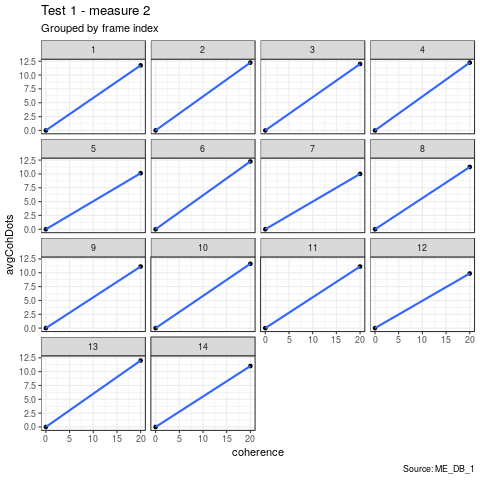

In [14]:
%%R
# Base Plot
g <- ggplot(avgCohDotsTable, aes(x=coherence, y=avgCohDots)) + 
      geom_point() + 
      geom_smooth(method="lm", se=FALSE) + 
      theme_bw()  # apply bw theme

# Facet wrap with common scales
g + facet_wrap( ~ frameIdx) + 
    labs(title="Test 1 - measure 2", 
         caption = "Source: ME_DB_1", 
         subtitle="Grouped by frame index")  # Shared scales

# Facet wrap with free scales
#g + facet_wrap( ~ class, scales = "free") + labs(title="hwy vs displ", caption = "Source: mpg", subtitle="Ggplot2 - Faceting - Multiple plots in one figure with free scales")  # Scales free

# Measure 3
We use motion energy as computed by the Adelson & Bergen filters (implemented in [Kiani's lab](https://github.com/aernesto/Waskom_JVision_2018)).

## A few examples
First, let's load some pilot data collected with snow-dots, and compute motion energy on 5 trials.

In [49]:
# load csv file with pandas
# TODO: once the data is publicly available online, better to feed the URL directly into pd.read_csv()
dots_table = pd.read_csv("../data/pilot11_dotsPositions.csv") 
trials_table = pd.read_csv("../data/pilot11_FIRA.csv")

# only look at 5 trial for now (say trialCount = 2 through 6), and only active dots
dots_table = dots_table[(dots_table['trialCount'] >= 2) & (dots_table['trialCount'] <= 6) & (dots_table['isActive'] == 1)]
trials_table = trials_table[1:6]
print('head of dots_table\n',dots_table.head(),'\n\n trials_table:\n',trials_table)

head of dots_table
           xpos      ypos  isActive  isCoherent  frameIdx  trialCount
4368  0.694646  0.373345         1           1         1           2
4371  0.274437  0.104395         1           1         1           2
4374  0.665870  0.346329         1           1         1           2
4377  0.883785  0.547718         1           1         1           2
4380  0.275199  0.866764         1           1         1           2 

 trials_table:
    taskID  trialIndex    trialStart      trialEnd        RT  choice  correct  \
1       2         300  1.211400e+06  1.211405e+06  0.920642     0.0      1.0   
2       2         281  1.211405e+06  1.211409e+06  0.859871     0.0      1.0   
3       2         564  1.211409e+06  1.211414e+06  1.124540     0.0      1.0   
4       2         112  1.211414e+06  1.211418e+06  0.875125     0.0      0.0   
5       2         279  1.211418e+06  1.211422e+06  0.979442     0.0      1.0   

   initDirection  endDirection  presenceCP     ...      targetOn   

In [30]:
num_trials = len(trials_table.index)

In [23]:
# this cell converts the dots stimuli from our format to the format of the motionenergy module
dots = [] # store dots stimulus from each trial as a list of 3D matrices
for trial in range(num_trials):
    # get parameters
    snow_dots_params = {
    'diameter': 10,
    'density': 90,
    'pixelSize': 4,
    'speed': 2.1,
    'coherence': trials_table.loc[trial+1,'coherence'],
    'pixelsPerDegree': 55.4612,  # verified in Pilot11 dataset
    'windowFrameRate': 60,
    'viewingDuration': trials_table.loc[trial+1,'dotsOff'] - trials_table.loc[trial+1,'dotsOn'],
    'randSeedBase': trials_table.loc[trial+1,'randSeedBase']
    }
    
    dots_params = my_me.map_snow_dots_params_to_kiani_dots(snow_dots_params)
    
    # Determine the parameters of the display

    ppd = dots_params['ppd']
    radius = dots_params['radius']
    framerate = dots_params['framerate']

    # Determine the parameters of the stimulus

    density = dots_params['density']
    size = dots_params['size'] 
    speed = dots_params['speed']
    coherence = dots_params['coherence']
    moments = dots_params['moments']
    duration = dots_params['duration']
    
    # transform coordinates of dots positions to pixel index in final image (this cell and the following 2)
    # I get inspiration from stimulus.dot_movie()
    
    # Initialize the spatial grid
    n_pix = int(2 * radius * ppd)
    grid = np.linspace(-radius, radius, n_pix)
    xx, yy = np.meshgrid(grid, grid)
    
    dots_curr_trial = dots_table[dots_table['trialCount'] == (trial + 2)] # TODO: this hard-coding is NOT ROBUST
    
    numFrames = max(dots_curr_trial['frameIdx'])
    
    # make the dots stimulus
    # Once again, I get inspiration from stimulus.dot_movie()
    frames = []
    for frame_idx in range(numFrames):

        # get the two cols from the dataframe into 2-by-numDots numpy array
        xy = np.transpose(
                np.array(
                    dots_curr_trial[dots_curr_trial['frameIdx'] == frame_idx + 1][['xpos','ypos']]
                )
             )

        # convert snow-dots normalized positions to visual angles coordinates (centered as 0 = fixation point)
        xy = xy * 2 * radius - radius

        # Create a blank image for this frame
        img = np.zeros_like(xx)

        # Draw dots in the screen image
        i, j = np.round(xy * ppd + radius * ppd - size / 2).astype(np.int)
        img[i, j] = 1
        img = maximum_filter(img, size)

        frames.append(img)

    dots.append(np.stack(frames, axis=-1))

In [26]:
print(type(dots),'\n',
      len(dots),'\n',
     [x.shape for x in dots])

<class 'list'> 
 5 
 [(554, 554, 32), (554, 554, 27), (554, 554, 13), (554, 554, 32), (554, 554, 25)]


In [28]:
filter_shape = 64, 64, 25                 # size parameter of motion_filters()
filter_res = 1 / ppd, 1 / ppd, framerate
filters = kiani_me.motion_filters(filter_shape, filter_res)

In [29]:
%%time
dots_energy = [kiani_me.apply_motion_energy_filters(x, filters) for x in dots]

CPU times: user 32min 52s, sys: 45.1 s, total: 33min 37s
Wall time: 33min 44s


Before plotting motion energy of our trials, let's display some summary info about our trials.

In [50]:
frame_count_offset = 4
trials_table['numFrames'] -= frame_count_offset # correct for current bug in frame count 
trials_table[["initDirection","endDirection","viewingDuration","coherence","numFrames"]]

,initDirection,endDirection,viewingDuration,coherence,numFrames
1,180,180,0.5,60,32
2,0,180,0.4,24,27
3,180,180,0.2,60,13
4,180,0,0.5,12,32
5,0,180,0.4,12,25


<Figure size 1152x576 with 0 Axes>

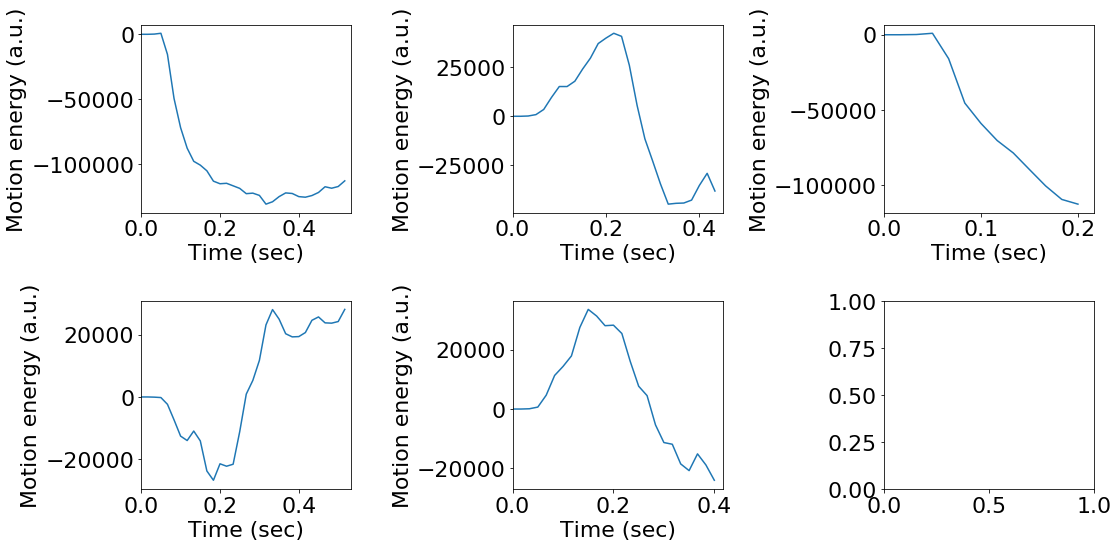

In [51]:
plt.rcParams["figure.figsize"] = (16, 8) # (w, h) # figure size 
plt.rcParams.update({'font.size': 22}) # font size on axes
plt.subplots_adjust(wspace=0.5) # horizontal space between panels
f, ax = plt.subplots(2,3, sharex=False)
for trial in range(num_trials):
    # next two lines very inefficient/inelegant
    dots_curr_trial = dots_table[dots_table['trialCount'] == (trial + 2)] # TODO: this hard-coding is NOT ROBUST
    num_frames = max(dots_curr_trial['frameIdx'])
    
    t = kiani_me.filter_grid(num_frames, framerate)
    
    ax[np.unravel_index(trial, (2,3))].plot(t, dots_energy[trial].sum(axis=(0, 1)))
    ax[np.unravel_index(trial, (2,3))].set(xlim=(0, num_frames * framerate), ylim=(None, None),
           xlabel="Time (sec)",
           ylabel="Motion energy (a.u.)")
f.tight_layout()